# End-to-End RANDOM FOREST Example - NOAA Seattle weather data

## Supervised Regression ML problem:
## Predict the Max Temperature for tomorrow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
features = pd.read_csv("/Users/MPHA/Downloads/temps.csv")
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


## Identify Anomalies / Missing Data

In [5]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


In [6]:
# For this particular problem, we don't need forecast features - Drop them

features = features.drop(['forecast_noaa', 'forecast_acc', 'forecast_under'], axis=1)
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 9)


In [7]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


## Data Preparation 
### One-Hot Encoding

In [8]:
# One-Hot Encode the categorical features (week) to Numerical

features = pd.get_dummies(features)
features.head(5)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [9]:
features.shape

(348, 15)

### Separate the data into Features and Targets

In [10]:
# Target (labels) is 'actual'

# the Algorithm needs you to Convert pandas dataframes to Numpy arrays
# save the column headers as a list, for future visualization

labels = np.array(features['actual'])

# remove labels from the features, axis=1 refers to columns
features = features.drop('actual', axis=1)

feature_list = list(features.columns)

features = np.array(features)

### Split the data into Training and Test sets

In [11]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels,
                                                                           test_size=0.25,
                                                                           random_state=42)

In [12]:
print('Training features shape:', train_features.shape)
print('Training labels shape:', train_labels.shape)
print('Test features shape:', test_features.shape)
print('Test labels shape:', test_labels.shape)

Training features shape: (261, 14)
Training labels shape: (261,)
Test features shape: (87, 14)
Test labels shape: (87,)


#### Data Preparation was - one-hot encoding, converting dataframes to arrays, split features/labels, split training/test

## Establish Baseline - Our model hopes to beat this (historical avg)

In [15]:
# establish Baseline errors

baseline_preds = test_features[:, feature_list.index('average')]
baseline_errors = abs(baseline_preds - test_labels)

print('average baseline error:', round(np.mean(baseline_errors), 2))

average baseline error: 5.06


## TRAIN MODEL

In [16]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
# Make Predictions on the Test Set  -  use the Absolute Error

predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.83 degrees.


#### The average estimate (max temp) is off by 3.83 degrees - a 1.22 degree improvement from the Baseline
#### Almost 25 %

In [19]:
# mean absolute percentage error (mape)

mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.99 %.


## Our model predicts Max Temp for the next day in Seattle with about 94 % accuracy

### Interpret the model - Variable Importances

In [22]:
# quantify usefulness of rf variables

# get numerical feature importance
importances = list(rf.feature_importances_)

# list of tuples w variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
                      importance in zip(feature_list, importances)]

# sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print features and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.69
Variable: average              Importance: 0.2
Variable: day                  Importance: 0.03
Variable: friend               Importance: 0.03
Variable: temp_2               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


### The best predictor is temp_1 (max temp on Previous Day) - the next best is average (historical max temp avg) - year, is the same for all observations, 0.0

#### In future model implementations, you can Remove features of 0 importance

#### If using a different model (like SVM), RF importances can help with Feature Selection

In [25]:
# Check a Random Forest with only the 2 most importanct Features

rf_most_important = RandomForestRegressor(n_estimators=1000, random_state=42)

#extract the features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

#test the rf
rf_most_important.fit(train_important, train_labels)

#make predictions, determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.91 degrees.
Accuracy: 93.78 %.


## Using only the 2 most important variables, achieves nearly the same accuracy

## VISUALIZATIONS

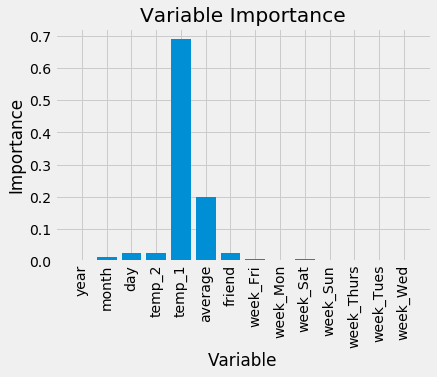

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

#set style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# x axis Tick labels, Axis lables, and Title
plt.xticks(x_values, feature_list, rotation = 'vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); 
plt.title('Variable Importance');

## PLOT the Entire Dataset - Highligh Predictions

In [29]:
# create date objects for plotting
import datetime

# dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

# list, then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' +
        str(int(day)) for year, month, day in zip(years, months, days)]

dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

Text(0.5,1,'Actual and Predicted Values')

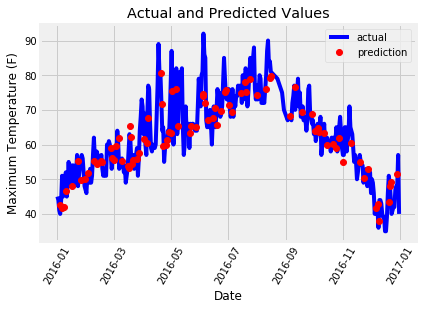

In [30]:
# dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]

# column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + 
             str(int(day)) for year, month, day in zip(years,
                                                      months, 
                                                      days)]

# convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d')
             for date in test_dates]

# dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'data': test_dates,
                                       'prediction': predictions})


# plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label
        = 'actual')

# plot the predicted values
plt.plot(predictions_data['data'],
predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()

# graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)');
plt.title('Actual and Predicted Values')

### Above - don't see any major Outliers

## FINAL CHART - Actual Values, previous day temp, historical avg, and friend's prediction

#### See the difference between useful variables, and not so helpful variables

Text(0.5,1,'Actual Max Temp and Variables')

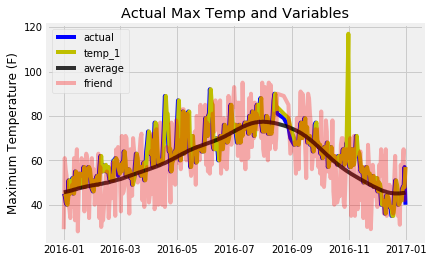

In [33]:
# make the data accessible
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]

# plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label='actual', alpha=1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label='temp_1', alpha=1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label='average', alpha=0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label='friend', alpha=0.3)

# formatting plot
plt.legend(); plt.ylabel('Maximum Temperature (F)'); 
plt.title('Actual Max Temp and Variables')

### CONCLUSION - the Random Forest provided the Previous Day Temp as the strongest predictor, followed by Historical Average

### Our model could be improved by trying different hyperparameters (variables, nodes), using a different algorithm, or by collecting more data

In [35]:
# Some Notes from Will Koehrsen - Random Forest in Python